In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
from vega_datasets import data

### PART 1

In [25]:
df = data.sf_temps()

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [26]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [27]:
df = df.set_index('date')
df = df.sort_index()

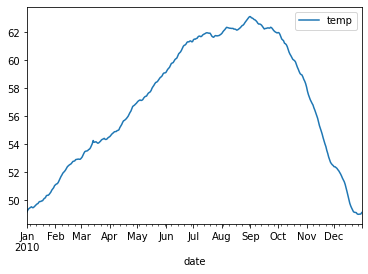

In [32]:
df.resample('D').mean().plot(label='avg temp per day')
plt.legend()
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

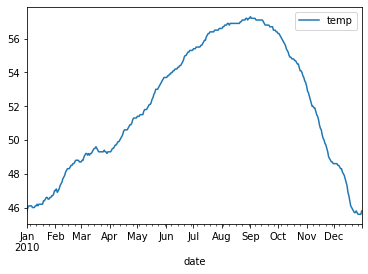

In [33]:
df.resample('D').min().plot(label='min temp per day')
plt.legend()
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

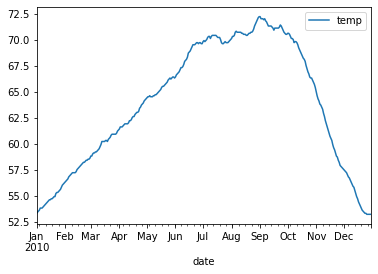

In [34]:
df.resample('D').max().plot(label='max temp per day')
plt.legend()
plt.show()

#### 4. Which month is the coldest, on average?

In [37]:
df.resample('M').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

#### 5. Which month has the highest average temperature?

In [38]:
df.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [56]:
days = df.resample('D').agg(['min', 'max'])
days

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [57]:
days.columns = days.columns.droplevel(0)
days

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [60]:
days['change'] = days['max'] - days['min']
days

,min,max,change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [63]:
days.resample('M').mean().change.idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

----

### PART 2

In [68]:
df = data.seattle_weather()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [70]:
df = df.set_index('date')
df = df.sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


#### 1. Which year and month combination has the highest amount of precipitation?

In [72]:
df.resample('M').sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

#### 2. Visualize the amount of monthly precipitation over time.

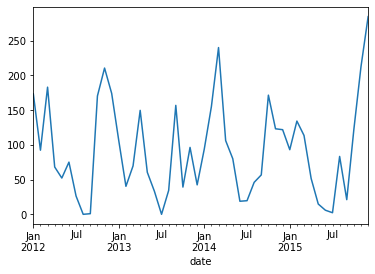

In [73]:
df.resample('M').sum().precipitation.plot()
plt.show()

#### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

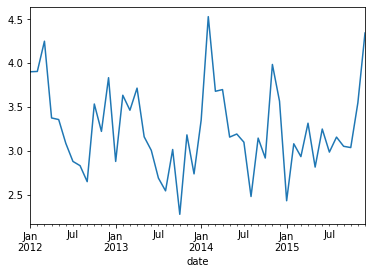

In [76]:
df.resample('M').mean().wind.plot()
plt.show()

#### 4. Which year-month combination is the windiest?

In [79]:
df.resample('M').sum().wind.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

#### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [88]:
df[['weather']][df.weather == 'sun'].resample('Y').count().idxmax()

weather   2014-12-31
dtype: datetime64[ns]

#### 6. In which month does it rain the most?

In [89]:
df[['weather']][df.weather == 'rain'].resample('M').count().idxmax()

weather   2012-11-30
dtype: datetime64[ns]

#### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [92]:
df[['precipitation']][df.precipitation > 0].resample('M').count().idxmax()

precipitation   2012-12-31
dtype: datetime64[ns]

----

### PART 3

In [93]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [95]:
df = df.set_index('date')
df = df.sort_index()

#### 1. Convert any negative delays to 0.

In [105]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [107]:
df.delay = df.delay.where(df.delay > 0, 0)

#### 2. Which hour of the day has the highest average delay?

In [116]:
df['hour'] = df.index.hour

In [117]:
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [120]:
df[['delay', 'hour']].groupby('hour').delay.mean().idxmax()

3

#### 3. Does the day of the week make a difference in the delay amount?

In [124]:
df['dayofweek'] = df.index.dayofweek

In [125]:
df[['delay', 'dayofweek']].groupby('dayofweek').delay.mean()

dayofweek
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

#### 4. Does the month make a difference in the delay amount?

In [128]:
df['month'] = df.index.month

In [129]:
df[['delay', 'month']].groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

----

### PART 4

#### 1. Use the sf_temps dataset

In [131]:
df = data.sf_temps()
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


#### 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,8759.0,56.924112,6.107079,45.6,52.3,56.5,60.7,72.2


In [134]:
df['feelz'] = pd.qcut(df.temp, 4, labels=['cold','cool', 'warm', 'hot'])

In [135]:
df.feelz.value_counts()

cool    2218
cold    2210
hot     2175
warm    2156
Name: feelz, dtype: int64

#### 3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

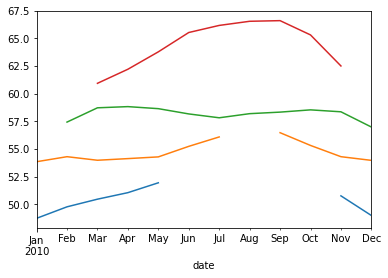

In [138]:
df[df.feelz == 'cold'].resample('M').mean().temp.plot()
df[df.feelz == 'cool'].resample('M').mean().temp.plot()
df[df.feelz == 'warm'].resample('M').mean().temp.plot()
df[df.feelz == 'hot'].resample('M').mean().temp.plot()

plt.show()

#### 4. Create pretty labels for time plots

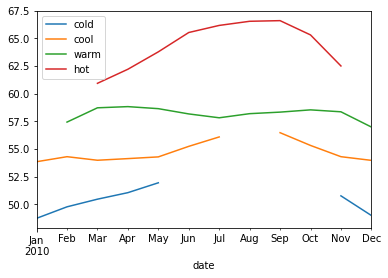

In [139]:
df[df.feelz == 'cold'].resample('M').mean().temp.plot(label='cold')
df[df.feelz == 'cool'].resample('M').mean().temp.plot(label='cool')
df[df.feelz == 'warm'].resample('M').mean().temp.plot(label='warm')
df[df.feelz == 'hot'].resample('M').mean().temp.plot(label='hot')
plt.legend()
plt.show()

#### 5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [144]:
df['month'] = df.index.month

In [145]:
df.head()

,temp,feelz,month
date,,,
2010-01-01 00:00:00,47.8,cold,1
2010-01-01 01:00:00,47.4,cold,1
2010-01-01 02:00:00,46.9,cold,1
2010-01-01 03:00:00,46.5,cold,1
2010-01-01 04:00:00,46.0,cold,1


In [147]:
import seaborn as sns

<AxesSubplot:xlabel='month', ylabel='Count'>

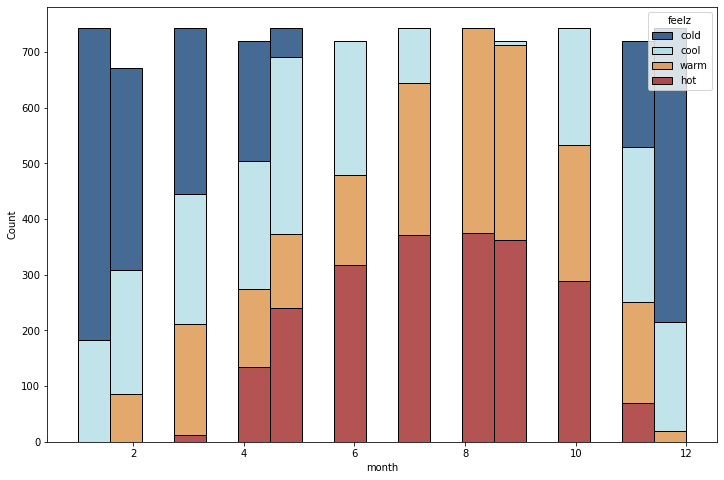

In [160]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='month', hue='feelz', multiple='stack', palette=['#063970', '#abdbe3', '#DA8B3A', '#9A191B'])